In [38]:
import socnet as sn
import networkx as nx
import pickle
import holoviews as hv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as ss
import datetime

# hv.extension('bokeh')
# %opts Graph [width=400 height=400]

In [39]:
sn.node_size = 10
sn.node_color = (255, 255, 255)

sn.edge_width = 1
sn.edge_color = (192, 192, 192)

sn.node_label_position = 'top center'

In [41]:
try:
    g = pickle.load(open('graph.p', 'rb'))
except:
    g = sn.load_graph('./collector/output.gml', has_pos=False)
    pickle.dump(g, open('graph.p', 'wb'))

for n in g.nodes:
    if ('country' not in g.nodes[n]):
        g.nodes[n]['country'] = None
    if ('publishedAt' not in g.nodes[n]):
        g.nodes[n]['publishedAt'] = None
        
    g.nodes[n]['viewCount'] = int(g.nodes[n]['viewCount'])
    g.nodes[n]['subscriberCount'] = int(g.nodes[n]['subscriberCount'])
    g.nodes[n]['videoCount'] = int(g.nodes[n]['videoCount'])
    if g.nodes[n]['publishedAt'] != None:
        g.nodes[n]['publishedAt'] = datetime.datetime.fromisoformat(g.nodes[n]['publishedAt'][:-1]).timestamp()

In [4]:
#sn.show_graph(g, nlab=False)

In [5]:
in_degree = sorted([(g.nodes[k], v) for k, v in dict(g.in_degree()).items()], key=lambda x: -x[1])
# s = [g.nodes[x[0]] for x in s if g.nodes[x[0]]['country'] == 'BR']
in_degree

[({'visited': 1,
   'title': 'Vevo',
   'publishedAt': '2006-04-14T17:07:29.000Z',
   'viewCount': '549779903',
   'commentCount': '0',
   'subscriberCount': '17726175',
   'hiddenSubscriberCount': 0,
   'videoCount': '1552',
   'topics': {'n0': 'music'},
   'counterId': 956,
   'color': (255, 255, 255),
   'pos': (0.5339688413982051, 0.3292912282625936),
   'country': None},
  25),
 ({'visited': 1,
   'title': 'Elgato Gaming',
   'publishedAt': '2010-06-22T21:03:16.000Z',
   'viewCount': '6547153',
   'commentCount': '0',
   'subscriberCount': '354843',
   'hiddenSubscriberCount': 0,
   'videoCount': '153',
   'topics': {'n0': 'gaming', 'n1': 'technology', 'n2': 'lifestyle'},
   'counterId': 1475,
   'color': (255, 255, 255),
   'pos': (0.13541765653438587, 0.8278394288222638),
   'country': None},
  24),
 ({'visited': 1,
   'title': 'Vikkstar123',
   'country': 'GB',
   'publishedAt': '2010-04-12T12:39:25.000Z',
   'viewCount': '1475937480',
   'commentCount': '0',
   'subscriberCoun

In [6]:
bw = nx.betweenness_centrality(g)
betweenness = sorted([(g.nodes[k], v) for k, v in bw.items()], key=lambda x: -x[1])

In [7]:
betweenness

[({'visited': 1,
   'title': 'La Fenix',
   'country': 'BR',
   'publishedAt': '2010-09-01T02:59:03.000Z',
   'viewCount': '573202164',
   'commentCount': '0',
   'subscriberCount': '3538332',
   'hiddenSubscriberCount': 0,
   'videoCount': '1009',
   'topics': {'n0': 'entertainment', 'n1': 'lifestyle'},
   'counterId': 19,
   'color': (255, 255, 255),
   'pos': (0.4969023187506615, 0.45732508472518413)},
  0.02697825684919639),
 ({'visited': 1,
   'title': 'BRKsEDU',
   'country': 'BR',
   'publishedAt': '2010-07-30T02:06:06.000Z',
   'viewCount': '1318455770',
   'commentCount': '0',
   'subscriberCount': '7353952',
   'hiddenSubscriberCount': 0,
   'videoCount': '3762',
   'topics': {'n0': 'action game', 'n1': 'gaming'},
   'counterId': 96,
   'color': (255, 255, 255),
   'pos': (0.4471181461766864, 0.42499440172747555)},
  0.025586580425197625),
 ({'visited': 1,
   'title': 'Peter Hollens',
   'country': 'US',
   'publishedAt': '2011-01-06T08:43:18.000Z',
   'viewCount': '355740788

### Kindness

In [42]:
def kindness(cid):
    own_subs = int(g.nodes[cid]['subscriberCount'])
    kindness = 0
    neighbors = list(nx.neighbors(g, cid))
    if (len(neighbors) == 0):
        return 0
    
    neighbor_subs = [int(g.nodes[n]['subscriberCount']) for n in neighbors]
    for ns in neighbor_subs:
        if (ns < 10):
            continue
        kindness += own_subs/ns
    kindness /= len(neighbors)
    return kindness

MAX_KINDNESS = 0
for n in g.nodes:
    g.nodes[n]['kindness'] = kindness(n)
    if g.nodes[n]['kindness'] > MAX_KINDNESS:
        MAX_KINDNESS = g.nodes[n]['kindness']

for n in g.nodes:
    g.nodes[n]['kindness'] /= MAX_KINDNESS

In [7]:
k = sorted([(g.nodes[k],g.nodes[k]['kindness']) for k in g.nodes], key=lambda x: -x[1])
k_br = sorted([(g.nodes[k],g.nodes[k]['kindness']) for k in g.nodes if g.nodes[k]['country'] == 'BR'], key=lambda x: -x[1])
k_br

[({'visited': 1,
   'title': 'Hoje e dia de Marias',
   'country': 'BR',
   'publishedAt': '2016-02-07T17:57:26.000Z',
   'viewCount': '515461324',
   'commentCount': '0',
   'subscriberCount': '2633115',
   'hiddenSubscriberCount': 0,
   'videoCount': '569',
   'topics': {'n0': 'hobby', 'n1': 'lifestyle'},
   'counterId': 2558,
   'color': (255, 255, 255),
   'pos': (0.5309357628230355, 0.5038837415916801),
   'kindness': 0.028209145291022444},
  0.028209145291022444),
 ({'visited': 1,
   'title': 'SanInPlay',
   'country': 'BR',
   'publishedAt': '2012-01-12T01:27:47.000Z',
   'viewCount': '111878056',
   'commentCount': '0',
   'subscriberCount': '1109162',
   'hiddenSubscriberCount': 0,
   'videoCount': '1238',
   'topics': {'n0': 'gaming'},
   'counterId': 762,
   'color': (255, 255, 255),
   'pos': (0.5069389617622548, 0.5278203256471768),
   'kindness': 0.02794042353650475},
  0.02794042353650475),
 ({'visited': 1,
   'title': 'Canal Voce Nao Sabia',
   'country': 'BR',
   'publ

In [43]:
df = pd.DataFrame({})

for n in g.nodes:
    df = df.append({
        'title': g.nodes[n]['title'],
        'country': g.nodes[n]['country'],
        'publishedAt': g.nodes[n]['publishedAt'],
        'viewCount': g.nodes[n]['viewCount'],
        'subscriberCount': g.nodes[n]['subscriberCount'],
        'videoCount': g.nodes[n]['videoCount'],
        'topics': g.nodes[n]['topics'],
        'kindness': g.nodes[n]['kindness'],
    }, ignore_index=True)

In [49]:
df.sort_values(by='kindness', ascending=False)

,country,kindness,publishedAt,subscriberCount,title,topics,videoCount,viewCount
7464,US,1.000000,1.38027e+09,1720153.0,ArcadeCloud,"{'n0': 'gaming', 'n1': 'movies', 'n2': 'entert...",503.0,4.053226e+08
8350,None,0.676378,1.29831e+09,1642539.0,Fantom,"{'n0': 'action game', 'n1': 'gaming'}",355.0,2.121830e+08
3757,US,0.493869,1.26765e+09,5949767.0,Bajan Canadian - Fortnite & More,"{'n0': 'role-playing video game', 'n1': 'gaming'}",4118.0,1.839091e+09
2940,US,0.396296,1.30876e+09,17035462.0,Little Baby Bum - Nursery Rhymes & Kids Songs,"{'n0': 'music', 'n1': 'movies', 'n2': 'enterta...",749.0,1.798132e+10
3087,GB,0.335149,1.39335e+09,2499087.0,Kiddyzuzaa - WildBrain,"{'n0': 'hobby', 'n1': 'lifestyle', 'n2': 'ente...",342.0,1.971491e+09
1756,US,0.324774,1.26608e+09,6203860.0,MatthewSantoro,"{'n0': 'music', 'n1': 'entertainment', 'n2': '...",736.0,1.240522e+09
2631,US,0.259580,1.34838e+09,23883797.0,Trap Nation,"{'n0': 'music', 'n1': 'hip hop music', 'n2': '...",1528.0,8.301439e+09
7203,US,0.239941,1.42334e+09,6531510.0,Toys Unlimited,"{'n0': 'hobby', 'n1': 'lifestyle'}",1589.0,4.344085e+09
5441,US,0.196915,1.40566e+09,1823213.0,RaceToyTime,"{'n0': 'lifestyle', 'n1': 'hobby'}",721.0,1.067655e+09
1645,GB,0.183704,1.32683e+09,1717134.0,ChaBoyyHD,"{'n0': 'action game', 'n1': 'gaming'}",1010.0,3.255311e+08


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



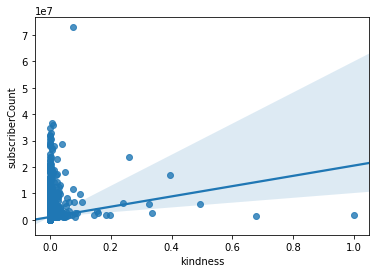

In [19]:
x = sns.regplot(data=df, x='kindness', y='subscriberCount')

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



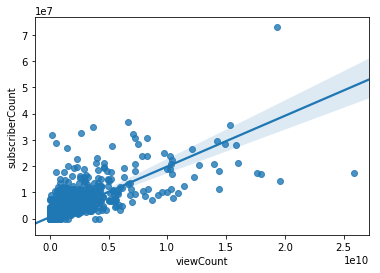

In [21]:
y = sns.regplot(data=df, x='viewCount', y='subscriberCount')

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



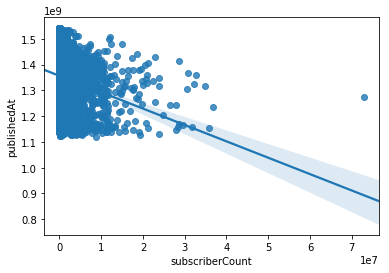

In [44]:
z = sns.regplot(data=df, x='subscriberCount', y='publishedAt')

In [46]:
df['kindness'].corr(df['subscriberCount'])

0.12292702623933897

In [47]:
df['viewCount'].corr(df['subscriberCount'])

0.7610870534177299

In [54]:
df['publishedAt'].astype(float).corr(df['subscriberCount'])

-0.1669796549579717

In [32]:
d = datetime.datetime.fromisoformat('2016-12-12T00:56:10.000').timestamp

In [31]:
d.timestamp()

1481511370.0

In [33]:
a = '21312213'

In [37]:
a[:-1]

'2131221'